#Time series analysis
In this analysis we have only time series and we use this data in order to extract meaningful characteristics and to forecast the future.
For example if you own a coffe shop, and you have the data of sales of your shope per month and  then you want to forecast the sales for coming month or the next year. And we have only the sales and the time data , in this case we will use time series analysis. 

The components of Time series:
1.Trend
2.seasonality
3.irregularity
4.cyclic

Important point in time series Analysis is:
Stationarity: Time series analysis requires the data to be stationary. TS then when it is behaving in a certain manner over time, there is a very high probability that it will follow the same in future.
How the data can be non stationary: because of Trend and seasonality.
For stationarity the time series should have a contant mean,constant variance, autocovariancce that does not depend on time.

Test to check stationarity:
1. Rolling staistics- plot moving average and moving variance and see if it varies with time.
2. ADFC OR dicky-FULLER TEST: We use null hypothesis 
n0: That the time series is stationary.Then we carry out some results and  find critical vvalues such as the p value, mean and variance and other time statistics to check if the data is stationary and then we check the hypothesis.
 
Now ARIMA OR SARIMA model:
SARIMA is nothing but seasonal ARIMA.

AR- Auto Regression(p=auto regressive lags)-- the correlation of the previous time period with the current one. PACF GRAPH

I- Integration (d=order of differentiation)

MA- moving average(q), ACF GRAPH


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [5]:
df.columns=['Months','Sales']
df.head()

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
#dropping the last two rows
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)
df.tail()

,Months,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [7]:
#converting the month into date time
df['Months']=pd.to_datetime(df['Months'])
df.head()

,Months,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [8]:
#we will remobe the index col and make our Months col the index col
df.set_index('Months',inplace=True)
df.head()

,Sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [9]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# We will be visualizing the data using different plots

<AxesSubplot:xlabel='Months'>

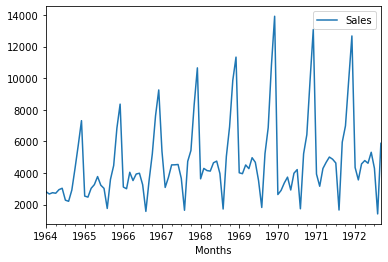

In [10]:
df.plot()

<ipython-input-11-ac03c1b18735>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(df['Sales'],Label='Original')
<ipython-input-11-ac03c1b18735>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(trend,Label='Trend')
<ipython-input-11-ac03c1b18735>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(seasonal,Label='seasonal')
<ipython-input-11-ac03c1b18735>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(residual,Label='residual')


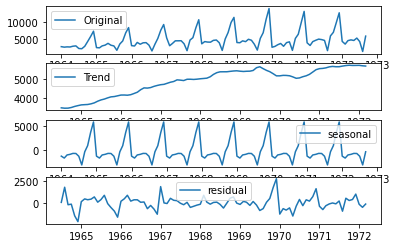

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df['Sales'])
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(411)
plt.plot(df['Sales'],Label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,Label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,Label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,Label='residual')
plt.legend(loc='best')

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
test_results=adfuller(df['Sales'])

In [14]:
#ADCF TEST USES THE NULL HYPOTHESIS CONCEPT
#N0= IT IS NOT A STATIONARY DATA
#N1=IT IS STATIONARY DATA
def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF TEST STATISTIC','P-VALUE','#LAGS USED','NUMBER OF OBSERVATIONS USED']
    for values,labels in zip(result,labels):
        print(labels+' : '+str(values))
    if result[1]<=0.05:
        print('The p-value is less and that give stong evidencce againts the null hypothesis and we will reject it and accept that this data is stationary')
            
    else:
        print('The p-value is large so  we can say that there is not much evidence again the null hypothesis so this data will not be staionary.')
            
            

In [15]:
adfuller_test(df['Sales'])

ADF TEST STATISTIC : -1.8335930563276248
P-VALUE : 0.363915771660244
#LAGS USED : 11
NUMBER OF OBSERVATIONS USED : 93
The p-value is large so  we can say that there is not much evidence again the null hypothesis so this data will not be staionary.


In [16]:
#Rolling statistics test
rolmean=df.rolling(window=12).mean()
rolstd=df.rolling(12).std()
print(rolmean.head(15),rolstd.head(15))

                  Sales
Months                 
1964-01-01          NaN
1964-02-01          NaN
1964-03-01          NaN
1964-04-01          NaN
1964-05-01          NaN
1964-06-01          NaN
1964-07-01          NaN
1964-08-01          NaN
1964-09-01          NaN
1964-10-01          NaN
1964-11-01          NaN
1964-12-01  3478.166667
1965-01-01  3455.333333
1965-02-01  3438.916667
1965-03-01  3461.916667                   Sales
Months                 
1964-01-01          NaN
1964-02-01          NaN
1964-03-01          NaN
1964-04-01          NaN
1964-05-01          NaN
1964-06-01          NaN
1964-07-01          NaN
1964-08-01          NaN
1964-09-01          NaN
1964-10-01          NaN
1964-11-01          NaN
1964-12-01  1555.294759
1965-01-01  1567.876232
1965-02-01  1577.823671
1965-03-01  1568.934465


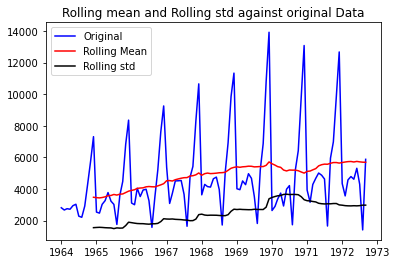

In [17]:
orig=plt.plot(df,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and Rolling std against original Data')
plt.show(block=False)

Now we got to knoo that our time series data is not stationary,what do we do to make it stationary.
We have to perform a method called differencing.
In differening here we will shift the sales data by  certain positions. And then we will calculate the difference between the shifted and original data.

In [18]:
df['Sales First Difference']=df['Sales']-df['Sales'].shift(1)

In [19]:
df.head()

,Sales,Sales First Difference
Months,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [20]:
df['Sesonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [21]:
df.head(15)

,Sales,Sales First Difference,Sesonal First Difference
Months,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [22]:
#now when we have processed the data we will check it again for the stationary test and we will also drop the null values
adfuller_test(df['Sesonal First Difference'].dropna())

ADF TEST STATISTIC : -7.626619157213163
P-VALUE : 2.060579696813685e-11
#LAGS USED : 0
NUMBER OF OBSERVATIONS USED : 92
The p-value is less and that give stong evidencce againts the null hypothesis and we will reject it and accept that this data is stationary


<AxesSubplot:xlabel='Months'>

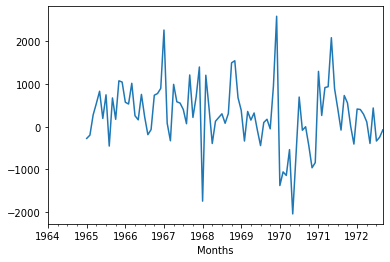

In [23]:
df['Sesonal First Difference'].plot()

In [24]:
rolmean=df['Sesonal First Difference'].dropna().rolling(window=12).mean()
rolstd=df['Sesonal First Difference'].dropna().rolling(12).std()
print(rolmean.head(15),rolstd.head(15))

Months
1965-01-01           NaN
1965-02-01           NaN
1965-03-01           NaN
1965-04-01           NaN
1965-05-01           NaN
1965-06-01           NaN
1965-07-01           NaN
1965-08-01           NaN
1965-09-01           NaN
1965-10-01           NaN
1965-11-01           NaN
1965-12-01    386.000000
1966-01-01    456.500000
1966-02-01    517.166667
1966-03-01    578.833333
Name: Sesonal First Difference, dtype: float64 Months
1965-01-01           NaN
1965-02-01           NaN
1965-03-01           NaN
1965-04-01           NaN
1965-05-01           NaN
1965-06-01           NaN
1965-07-01           NaN
1965-08-01           NaN
1965-09-01           NaN
1965-10-01           NaN
1965-11-01           NaN
1965-12-01    514.848080
1966-01-01    472.431525
1966-02-01    425.273139
1966-03-01    440.502777
Name: Sesonal First Difference, dtype: float64


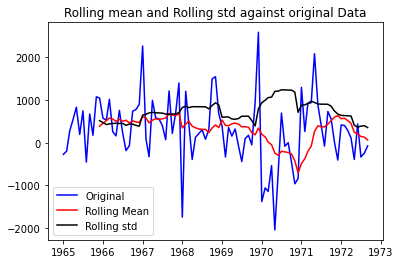

In [25]:
orig=plt.plot(df['Sesonal First Difference'].dropna(),color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and Rolling std against original Data')
plt.show(block=False)

Now when we have made sure that our data is stationary we can perform the ARIMA model OR THE SEASONAL ARIMA

#AUTO REGRESSIVE MODEL
we will import the module , and we will get the p part by plotting the pacf graph
In this we have to consider lags, I.E if i have to predict a future value then how many previous values will i have to consider, that is known as the lags. And we can get to kno about these lags by the particial Auto-correlation plot.

In [26]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

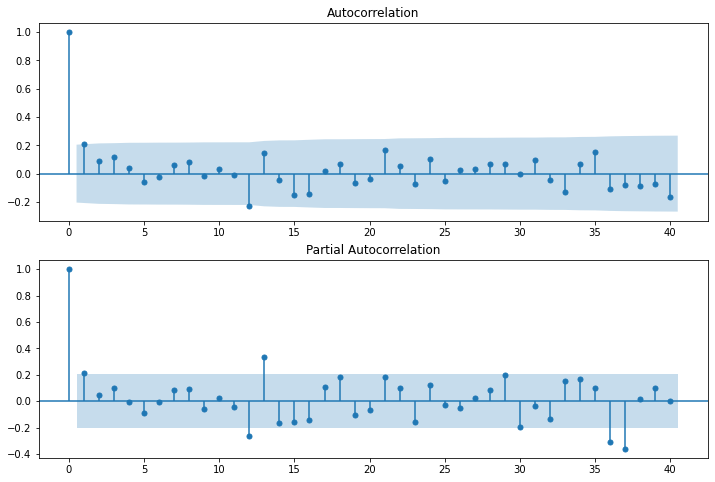

In [27]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['Sesonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['Sesonal First Difference'].iloc[13:],lags=40,ax=ax2)

From the PACF graph
so p=1
and 
From the ACF grapg
so q= 0 or 1
and bec we have shifted the data only once by a window of 12 months we will take d=1

In [28]:
from statsmodels.tsa.arima_model import ARIMA

In [29]:
#for non seasonal data 
#p=1,d=1,q=1
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\anu25\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\anu25\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Tue, 11 Jul 2023   AIC                           1910.251
Time:                        16:51:59   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7844     12.405      1.837      0.066      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Months'>

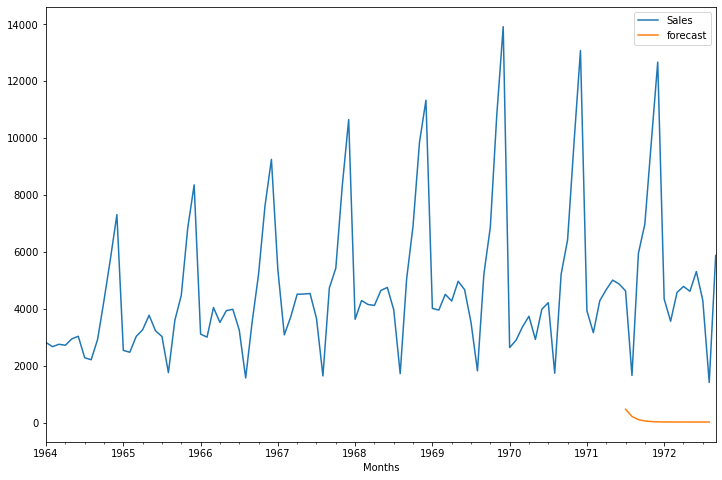

In [31]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

Now we will try using the seasonal ARIMAX

In [32]:
import statsmodels.api as sm

In [33]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\anu25\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\anu25\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Months'>

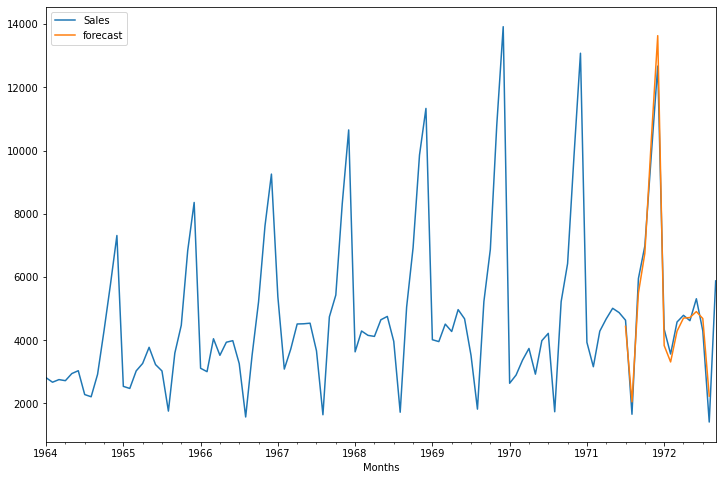

In [34]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

But now we will see how it is performing for the next coming years

In [35]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [36]:
future_dates_dataset=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [37]:
future_dates_dataset.tail()

,Sales,Sales First Difference,Sesonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [38]:
#concat both the df and the  future date dataset
future_df=pd.concat([df,future_dates_dataset])

<AxesSubplot:>

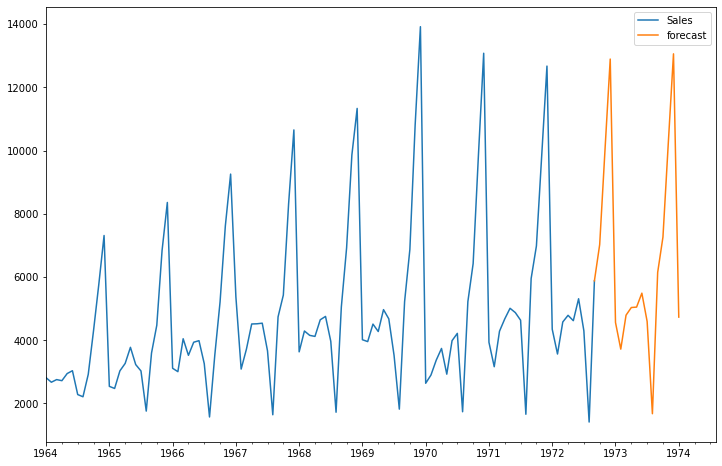

In [39]:
future_df['forecast']=results.predict(start=104,end=120,dynamic=True)
future_df[['Sales','forecast']].plot(figsize=(12,8))

In [40]:

future_10=results.forecast(steps=120)

<AxesSubplot:>

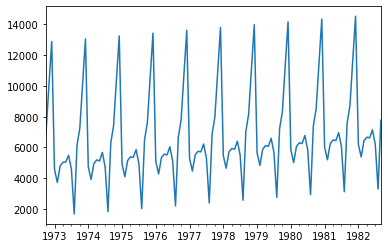

In [41]:
future_10.plot()